<a href="https://colab.research.google.com/github/hwangza125/-1/blob/projects/%EC%9D%B8%EA%B8%B0_%EB%A9%94%EB%89%B4_Top10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**멕시코풍 프랜타이즈 chipotle의 주문 데이터 분석하기**

- 가장 많이 판매된 메뉴 Top10은 무엇인가?
- 메뉴별 판매량은 얼마인가?
- 메뉴별 가격대는 얼마인가?

1. 탐색: 데이터의 기초 정보 확인

In [ ]:
import pandas as pd
file_path = '/content/drive/MyDrive/DA/data/chipotle.tsv'   #멕시코풍 프랜차이즈 chipotle 주문 데이터
chipo = pd.read_csv(file_path, sep='\t')
print(chipo.shape)
print("------------------------------------")
print(chipo.info())

(4622, 5)
------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


In [ ]:
#데이터셋 행열, 데이터 확인
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [ ]:
print(chipo.columns)
print("------------------------------------")
print(chipo.index)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
------------------------------------
RangeIndex(start=0, stop=4622, step=1)


- order_id: 주문 번호
- quantity: 주문 수량
- item_name: 상품명
- choice_description: 상품의 상세 선택 옵션
- item_price: 상품 가격

In [ ]:
#quantity, item_price의 수치적 특징. 둘 다 연속형
#describe() 함수로 기초 통계량 출력
chipo['order_id']=chipo['order_id'].astype(str)   #order_id는 숫자 의미가 아니므로 str으로 변환
chipo.describe()    #수치형 피처들의 기초 통계량 확인

,quantity
count,4622.000000
mean,1.075725
std,0.410186
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,15.000000


In [ ]:
#order_id, item_name의 개수. 둘 다 범주형이므로 unique를 사용해 범주 개수 확인
print(len(chipo['order_id'].unique()))
print(len(chipo['item_name'].unique()))

1834
50


2. 인사이트 발견: 탐색과 시각화

In [ ]:
#가장 많이 주문한 아이템 Top10
item_count=chipo['item_name'].value_counts()[:10]
for idx, (val, cnt) in enumerate(item_count.items(), 1):
  print("Top", idx, ":", val, cnt)

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Chips 211
Top 7 : Steak Bowl 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chips and Fresh Tomato Salsa 110


In [ ]:
#아이템별 주문 횟수
order_count=chipo.groupby('item_name')['order_id'].count()
order_count[:10]

,order_id
item_name,
6 Pack Soft Drink,54
Barbacoa Bowl,66
Barbacoa Burrito,91
Barbacoa Crispy Tacos,11
Barbacoa Salad Bowl,10
Barbacoa Soft Tacos,25
Bottled Water,162
Bowl,2
Burrito,6


In [ ]:
#아이템별 주문 총량
item_quantity=chipo.groupby('item_name')['quantity'].sum()
item_quantity[:10]

,quantity
item_name,
6 Pack Soft Drink,55
Barbacoa Bowl,66
Barbacoa Burrito,91
Barbacoa Crispy Tacos,12
Barbacoa Salad Bowl,10
Barbacoa Soft Tacos,25
Bottled Water,211
Bowl,4
Burrito,6


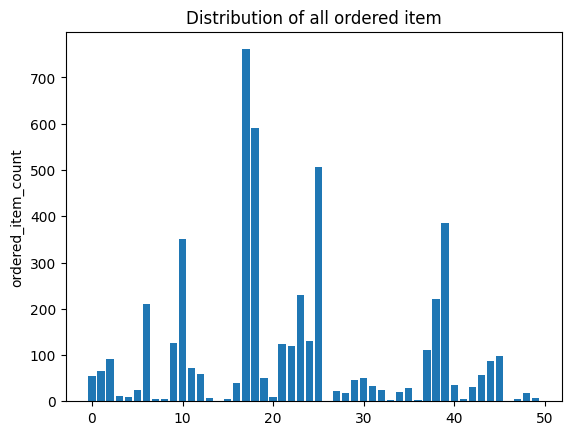

In [ ]:
#t시각화
import numpy as np
import matplotlib.pyplot as plt

item_name_list=item_quantity.index#.tolist()
x=np.arange(len(item_name_list))
y=item_quantity.values#.tolist()

plt.bar(x, y, align='center')
plt.ylabel('ordered_item_count')
plt.title('Distribution of all ordered item')

plt.show()

3. 데이터 전처리: 전처리 함수 사용

In [ ]:
#item_price 확인
print(chipo.info())
print('--------------')
print(chipo['item_price'].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB
None
--------------
0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object


In [ ]:
#apply()와 lambda로 데이터 전처리
chipo['item_price']=chipo['item_price'].apply(lambda x: float(x[1:]))
chipo.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


4. 탐색적 분석: 스무고개로 개념적 탐색 분석

In [ ]:
#주문당 평균 계산금액 출력
chipo.groupby('order_id')['item_price'].sum().mean()

np.float64(18.811428571428568)

- 한 사람이 '약 18달러 가량의 주문을 할 것'

In [ ]:
#한 주문에 10 달러 이상 지불한 주문번호 출력
chipo_orderid_group=chipo.groupby('order_id').sum()
results=chipo_orderid_group[chipo_orderid_group.item_price>=10]
print(results[:10])
print(results.index.values)

          quantity                                          item_name  \
order_id                                                                
1                4  Chips and Fresh Tomato SalsaIzzeNantucket Nect...   
10               2                    Chicken BowlChips and Guacamole   
100              2                           Steak BurritoCanned Soda   
1000             2                          Barbacoa BowlChicken Bowl   
1001             2                           Steak BurritoCanned Soda   
1002             2                      Barbacoa BurritoSide of Chips   
1003             2                  Carnitas BurritoCanned Soft Drink   
1004             2                                       Chicken Bowl   
1005             3              Chicken BurritoChipsCanned Soft Drink   
1006             8  Chicken Soft TacosVeggie BowlSteak BowlChicken...   

                                         choice_description  item_price  
order_id                                         

In [ ]:
#각 상품별 가격 구하기
chipo_one_item=chipo[chipo.quantity==1]
price_per_item=chipo_one_item.groupby('item_name').min()
price_per_item.sort_values(by="item_price", ascending=False)[:10]

,order_id,quantity,choice_description,item_price
item_name,,,,
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,1007,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Steak Soft Tacos,1054,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99


- 기존 주문내역은 주문 개수와 주문 내역, 총 가격을 나타내므로 각 상품별 가격을 알 수 없었음
- 이를 위해 주문 개수가 1개인 것을 골라 각 상품별 가격을 유추

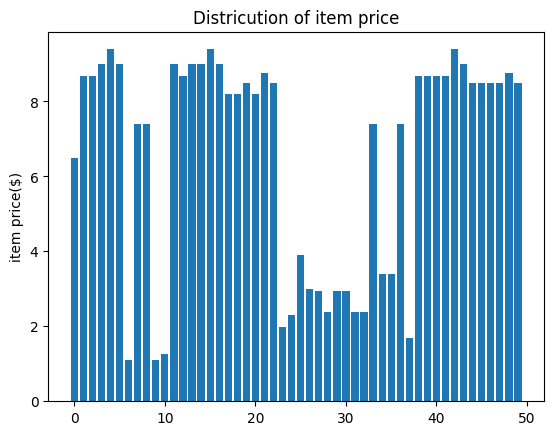

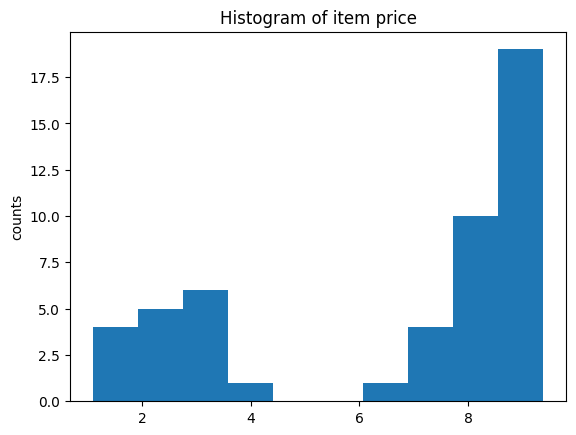

In [ ]:
#상품 가격 분포 그래프 출력
item_name_list=price_per_item.index.tolist()
x=np.arange(len(item_name_list))
item_price=price_per_item['item_price'].tolist()

plt.bar(x, item_price, align='center')
plt.ylabel('item price($)')
plt.title('Districution of item price')
plt.show()

#상품 가격 히스토그램 출력
plt.hist(item_price)
plt.ylabel('counts')
plt.title('Histogram of item price')
plt.show()

- 위 그래프를 통해 각 상품의 대략적인 가격을 막대그래프로 확인 가능
- 또한, 2~4, 6~8달러 정도에 상품의 가격대가 형성되어 있음을 확인 가능

In [ ]:
#가장 비싼 주문의 상품개수
chipo.groupby('order_id').sum().sort_values(by='item_price', ascending=False)[:5]

,quantity,item_name,choice_description,item_price
order_id,,,,
926,23,Steak BurritoChicken BowlChicken BowlChicken B...,"[Fresh Tomato Salsa, [Rice, Sour Cream, Lettuc...",205.25
1443,35,Chips and Fresh Tomato SalsaBottled Water6 Pac...,"[Coke][Fresh Tomato Salsa, [Fajita Vegetables,...",160.74
1483,14,Chicken BowlSteak BowlChicken BurritoSteak Bow...,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",139.00
691,11,Chicken BurritoChicken Salad BowlSteak Burrito...,"[Tomatillo Red Chili Salsa, [Rice, Cheese, Sou...",118.25
1786,20,Chicken BowlCarnitas BurritoChicken BowlChicke...,"[Fresh Tomato Salsa, Rice][Fresh Tomato Salsa,...",114.30


In [ ]:
#Veggie Salad Bowl'의 주문 횟수 구하기
chipo_salad=chipo[chipo['item_name']=="Veggie Salad Bowl"]
chipo_salad=chipo_salad.drop_duplicates(['item_name', 'order_id'])    #한 주문 내에서 중복 집계된 item_name 제거
print(len(chipo_salad))
print(chipo_salad.head(5))

18
    order_id  quantity          item_name  \
186       83         1  Veggie Salad Bowl   
295      128         1  Veggie Salad Bowl   
455      195         1  Veggie Salad Bowl   
496      207         1  Veggie Salad Bowl   
960      394         1  Veggie Salad Bowl   

                                    choice_description  item_price  
186  [Fresh Tomato Salsa, [Fajita Vegetables, Rice,...       11.25  
295  [Fresh Tomato Salsa, [Fajita Vegetables, Lettu...       11.25  
455  [Fresh Tomato Salsa, [Fajita Vegetables, Rice,...       11.25  
496  [Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...       11.25  
960  [Fresh Tomato Salsa, [Fajita Vegetables, Lettu...        8.75  


In [ ]:
#Chicken Bowl'을 2개 이상 주문한 주문 횟수
chipo_chicken=chipo[chipo['item_name']=='Chicken Bowl']
chipo_chicken_ordersum=chipo_chicken.groupby('order_id').sum()['quantity']
chipo_chicken_result=chipo_chicken_ordersum[chipo_chicken_ordersum>=2]
print(len(chipo_chicken_result))
print(chipo_chicken_result.head(5))

114
order_id
1004    2
1023    2
1072    2
1078    2
1091    2
Name: quantity, dtype: int64


- 데이터 분석 결과

|분석|컬럼|인사이트|
|----|----|----|
|가장 많이 주문된 상품|item_name|Chicken Bowl|
|주문된 전체 상품 종류|item_name|데이터셋에 총 50개의 주문된 상품이 존재|
|아이템당 주문된 총 개수|item_name|50개 중, 상위 8개 정도의 상품에 주문이 집중됨|
|주문당 평균 계산 금액|item_price|평균은 약 18, 표준편차는 11. 25%부터 75%에 해당하는 구간이 12~21이며 최대값이 200을 넘는 것으로 보아, 소수의 주문을 제외하면 대부분 평균 근처의 계산 금액을 보임. 표준편차 11은 예외처리를 통한 보정값을 계산할 여지가 있음|
|각 상품의 대략적인 가격|item_price|상품의 판매가격은 대부분 2에서 4, 6에서 8$ 정도|